In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Let's load dataset into data frame using pandas**

In [2]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can notice some missing data (Nan) values in the Cabin Column

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Let's take a look at missing data**

In [29]:
# True value means data is missing
data.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


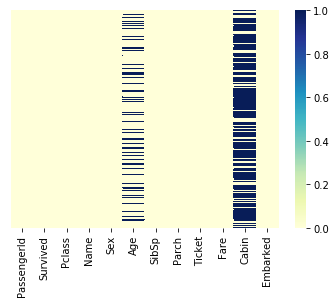

In [8]:
# A heatmap will give a better idea
sns.heatmap(data.isnull(),yticklabels=False, cmap="YlGnBu")

So a blue bar indicates a missing value. We can clearly see that most of the values in Cabin column is missing and around 20% of Age values are not known. If most data is Nan then the feature should be dropped as it adds only noise to the model.

**Let's explore the Survived class more**

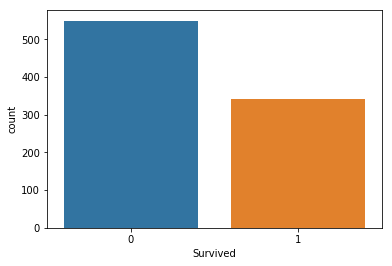

In [10]:
sns.countplot(x="Survived", data=data)

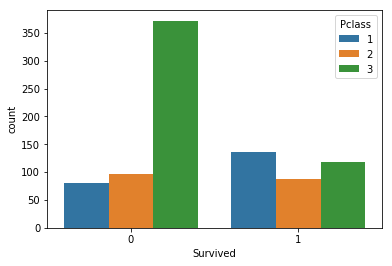

In [11]:
# Pclass refers to Passenger Class where 3 being the cheapest of them all.
sns.countplot(x="Survived", hue='Pclass',data=data)

As clearly seen most passengers belonging to 3 class didn't survive. We can also infer that more percentage of passengers belonged to 3 class. The plot of Fare feature can also be used to check

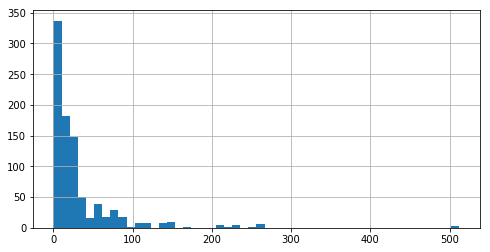

In [19]:
data["Fare"].hist(bins=50,figsize=(8,4))

As seen, the average Fare drifts towards the low value.

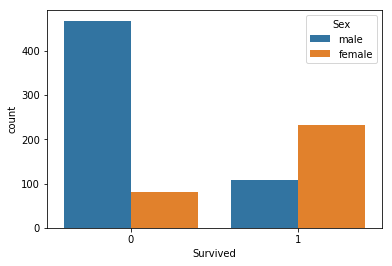

In [21]:
sns.countplot(x="Survived", hue='Sex',data=data)

Based on sex, it can be seen that most males didn't survive while females did.

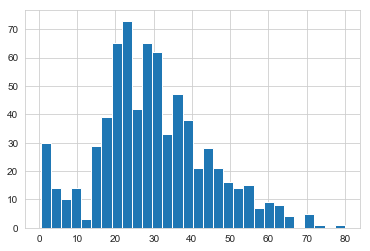

In [28]:
sns.set_style('whitegrid')
data['Age'].hist(bins=30)

So the major age groups were below 10 and between 20 to 30. 

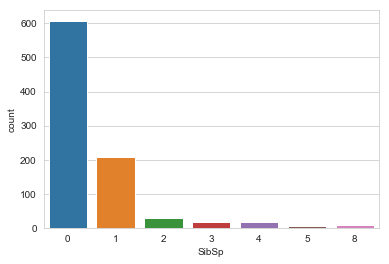

In [30]:
# SibSp refers to number of siblings/spouse.
sns.countplot(x="SibSp", data=data)

Major class is 0 meaning most passengers were single and the next class 1 which mostly means passengers were accompanied by their spouse.

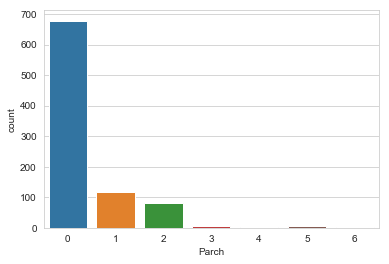

In [31]:
#Parch refers to Parents/Children present
sns.countplot(x="Parch", data=data)